In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

[(-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10)]
Iteration 1, RMSE: 28905.41706517122
weights: (0.32999999999999996, 0.32999999999999996, 0.34)
Iteration 2, RMSE: 94010.9743214704
weights: (0.329975, 0.329975, 0.34005)
Iteration 3, RMSE: 29808.53487254242
weights: (0.32742499999999997, 0.32742499999999997, 0.34515)
Iteration 4, RMSE: 31226.1469000266
weights: (0.32484999999999997, 0.32484999999999997, 0.3503)
Iteration 5, RMSE: 29457.497946047613
weights: (0.32225000000000004, 0.32225000000000004, 0.3555)
Iteration 6, RMSE: 32531.19591995348
weights: (0.322125, 0.322125, 0.35574999999999996)
Iteration 7, RMSE: 32702.886425460438
weights: (0.319475, 0.319475, 0.36105)
Iteration 8, RMSE: 39872.38163178825
weights: (0.31930000000000003, 0.31930000000000003, 0.3614)
Iteration 9, RMSE: 35055.058465337985
weights: (0.3191, 0.3191, 0.3618)
Iteration 10, RMSE: 35105.4968825247
weights: (0.31637499999999996, 0.31637499999999996, 0.36725)
Iteration 11, RMSE: 35989.12458878175
weights: (0.

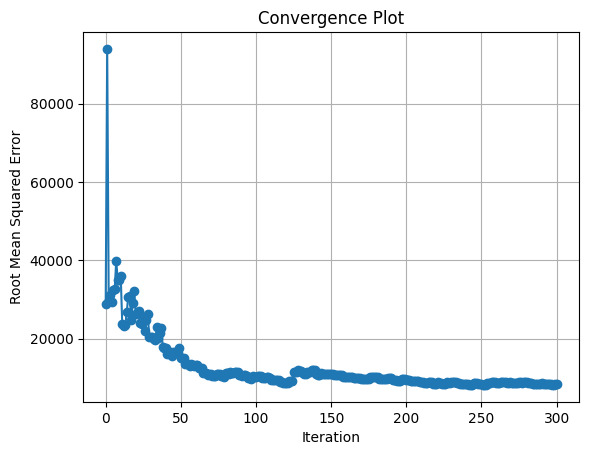

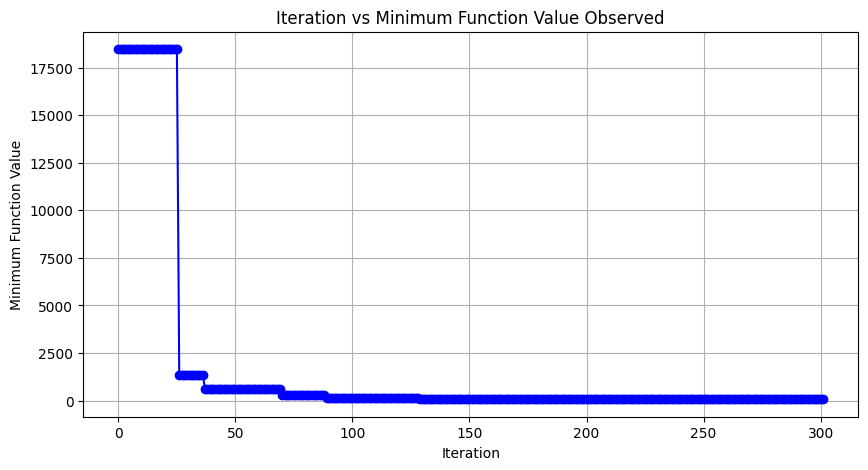

Best observed function value after active learning: 68.1621786790886


In [2]:
range_param = ex_func.function_ranges["Dixon Price"]
function_param = ex_func.dixon_price

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(function_param)
initial_points = sampler.sample(num_samples=5, ranges = range_param)
initial_values = np.array([function_param(i) for i in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning(200, range_param, 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results()

In [3]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Optuna with LHS and RF - to fix

function_name = "Eggholder"
ranges = ex_func.function_ranges[function_name]


def objective(trial):
    
    params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]

    X_train, X_val, y_train, y_val = train_test_split(params, y, test_size=0.2, random_state=23)

    rf_model = RandomForestRegressor(n_estimators=200, random_state=1729)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_val)

    return y_pred

X = np.random.uniform(-512, 512, size=(1000, 2)) 
function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))
y = np.array([function_param(x) for x in X])


study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
print('Best hyperparameters:', best_params)


[I 2024-05-09 22:48:08,301] A new study created in memory with name: no-name-e77111ae-fcc1-481c-a853-d26191fc3d55


C:\Users\user\AppData\Local\Temp\ipykernel_10436\30830781.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
[W 2024-05-09 22:48:08,304] Trial 0 failed with parameters: {'x0': -334.8654767554864, 'x1': -99.99371096640539} because of the following error: ValueError('Found input variables with inconsistent numbers of samples: [2, 1000]').
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Temp\ipykernel_10436\30830781.py", line 15, in objective
    X_train, X_val, y_train, y_val = train_test_split(params, y, test_siz

ValueError: Found input variables with inconsistent numbers of samples: [2, 1000]

In [2]:
# Optuna trial

import optuna

function_name = "Eggholder"

function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))


def objective(trial):
    ranges = ex_func.function_ranges[function_name]
    
    params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
    
    return function_param(params)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print('Best parameters:', study.best_params)
print('Best value:', study.best_value)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-05-09 22:47:09,214] A new study created in memory with name: no-name-380c0ec8-00d8-41f7-a188-afeee41e6325
C:\Users\user\AppData\Local\Temp\ipykernel_10436\2174273842.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
[I 2024-05-09 22:47:09,216] Trial 0 finished with value: -165.32538423190363 and parameters: {'x0': -40.30131701193045, 'x1': 203.61629992405733}. Best is trial 0 with value: -165.32538423190363.
[I 2024-05-09 22:47:09,217] Trial 1 finish

Best parameters: {'x0': -463.99089322763626, 'x1': 402.70822221658455}
Best value: -797.0393414634366
